In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
base_path = ''

In [2]:
df = pd.read_csv(base_path + 'test1018.csv')
df

,GDS_NM,PLU_CD,SALE_QTY,SALE_AMT
0,1000악세서리잡화,8243013275634771,1098,1098000
1,10L쓰레기봉투1장,3259200000268884,2756,854350
2,1200악세서리잡화,6816665883795391,943,1131600
3,1200풍선,3189007231104440,394,472800
4,12곡플러스그레인,3806840966753936,971,1558950
...,...,...,...,...
7123,히츠블루라벨전자담배,44450118685,666,2997000
7124,히츠실버,34063759737,564,2535800
7125,히츠실버라벨전자담배,27814336116,467,2101500
7126,히츠퍼플1,34503878808,508,2286000


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px

#Libraries for preprocessing
from gensim.parsing.preprocessing import remove_stopwords
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import webcolors

#Download once if using NLTK for preprocessing
import nltk
nltk.download('punkt')

#Libraries for vectorisation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from fuzzywuzzy import fuzz

#Libraries for clustering
from sklearn.cluster import KMeans



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\min\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\min\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
#Load data set
df = pd.read_csv('test1018.csv')
text1 = df['GDS_NM']

In [6]:
#Remove stopwords, punctuation and numbers
text2 = [remove_stopwords(x)\
        .translate(str.maketrans('','',string.punctuation))\
        .translate(str.maketrans('','',string.digits))\
        for x in text1]

In [7]:
#Stem and make lower case
def stemSentence(sentence):
    porter = PorterStemmer()
    token_words = word_tokenize(sentence)
    stem_sentence = [porter.stem(word) for word in token_words]
    return ' '.join(stem_sentence)

text3 = pd.Series([stemSentence(x) for x in text2])

In [8]:
#Remove colours
colors = list(webcolors.CSS3_NAMES_TO_HEX)
colors = [stemSentence(x) for x in colors if x not in ('bisque','blanchedalmond','chocolate','honeydew','lime',
                                         'olive','orange','plum','salmon','tomato','wheat')]
text4 = [' '.join([x for x in string.split() if x not in colors]) for string in text3]

In [9]:
#Bag of words
vectorizer_cv = CountVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(text4)

In [10]:
#TF-IDF (word level)
vectorizer_wtf = TfidfVectorizer(analyzer='word')
X_wtf = vectorizer_wtf.fit_transform(text4)

In [11]:
#TF-IDF (n-gram level)
vectorizer_ntf = TfidfVectorizer(analyzer='word',ngram_range=(1,2))
X_ntf = vectorizer_ntf.fit_transform(text4)

C:\Users\min\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53356 (\N{HANGUL SYLLABLE KEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48148 (\N{HANGUL SYLLABLE BA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45908 (\N{HANGUL SYLLABLE DEO}) missing from c

C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47548 (\N{HANGUL SYLLABLE RIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45805 (\N{HANGUL SYLLABLE DALG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\min\Anaconda3\lib\site-pa

C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51105 (\N{HANGUL SYLLABLE JAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52376 (\N{HANGUL SYLLABLE CEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 47100 (\N{HANGUL SYLLABLE REOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54168 (\N{HANGUL SYLLABLE PE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\min\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48128 (\N{HANGUL SYLLABLE MIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\min\Anaconda3\lib\site-pac

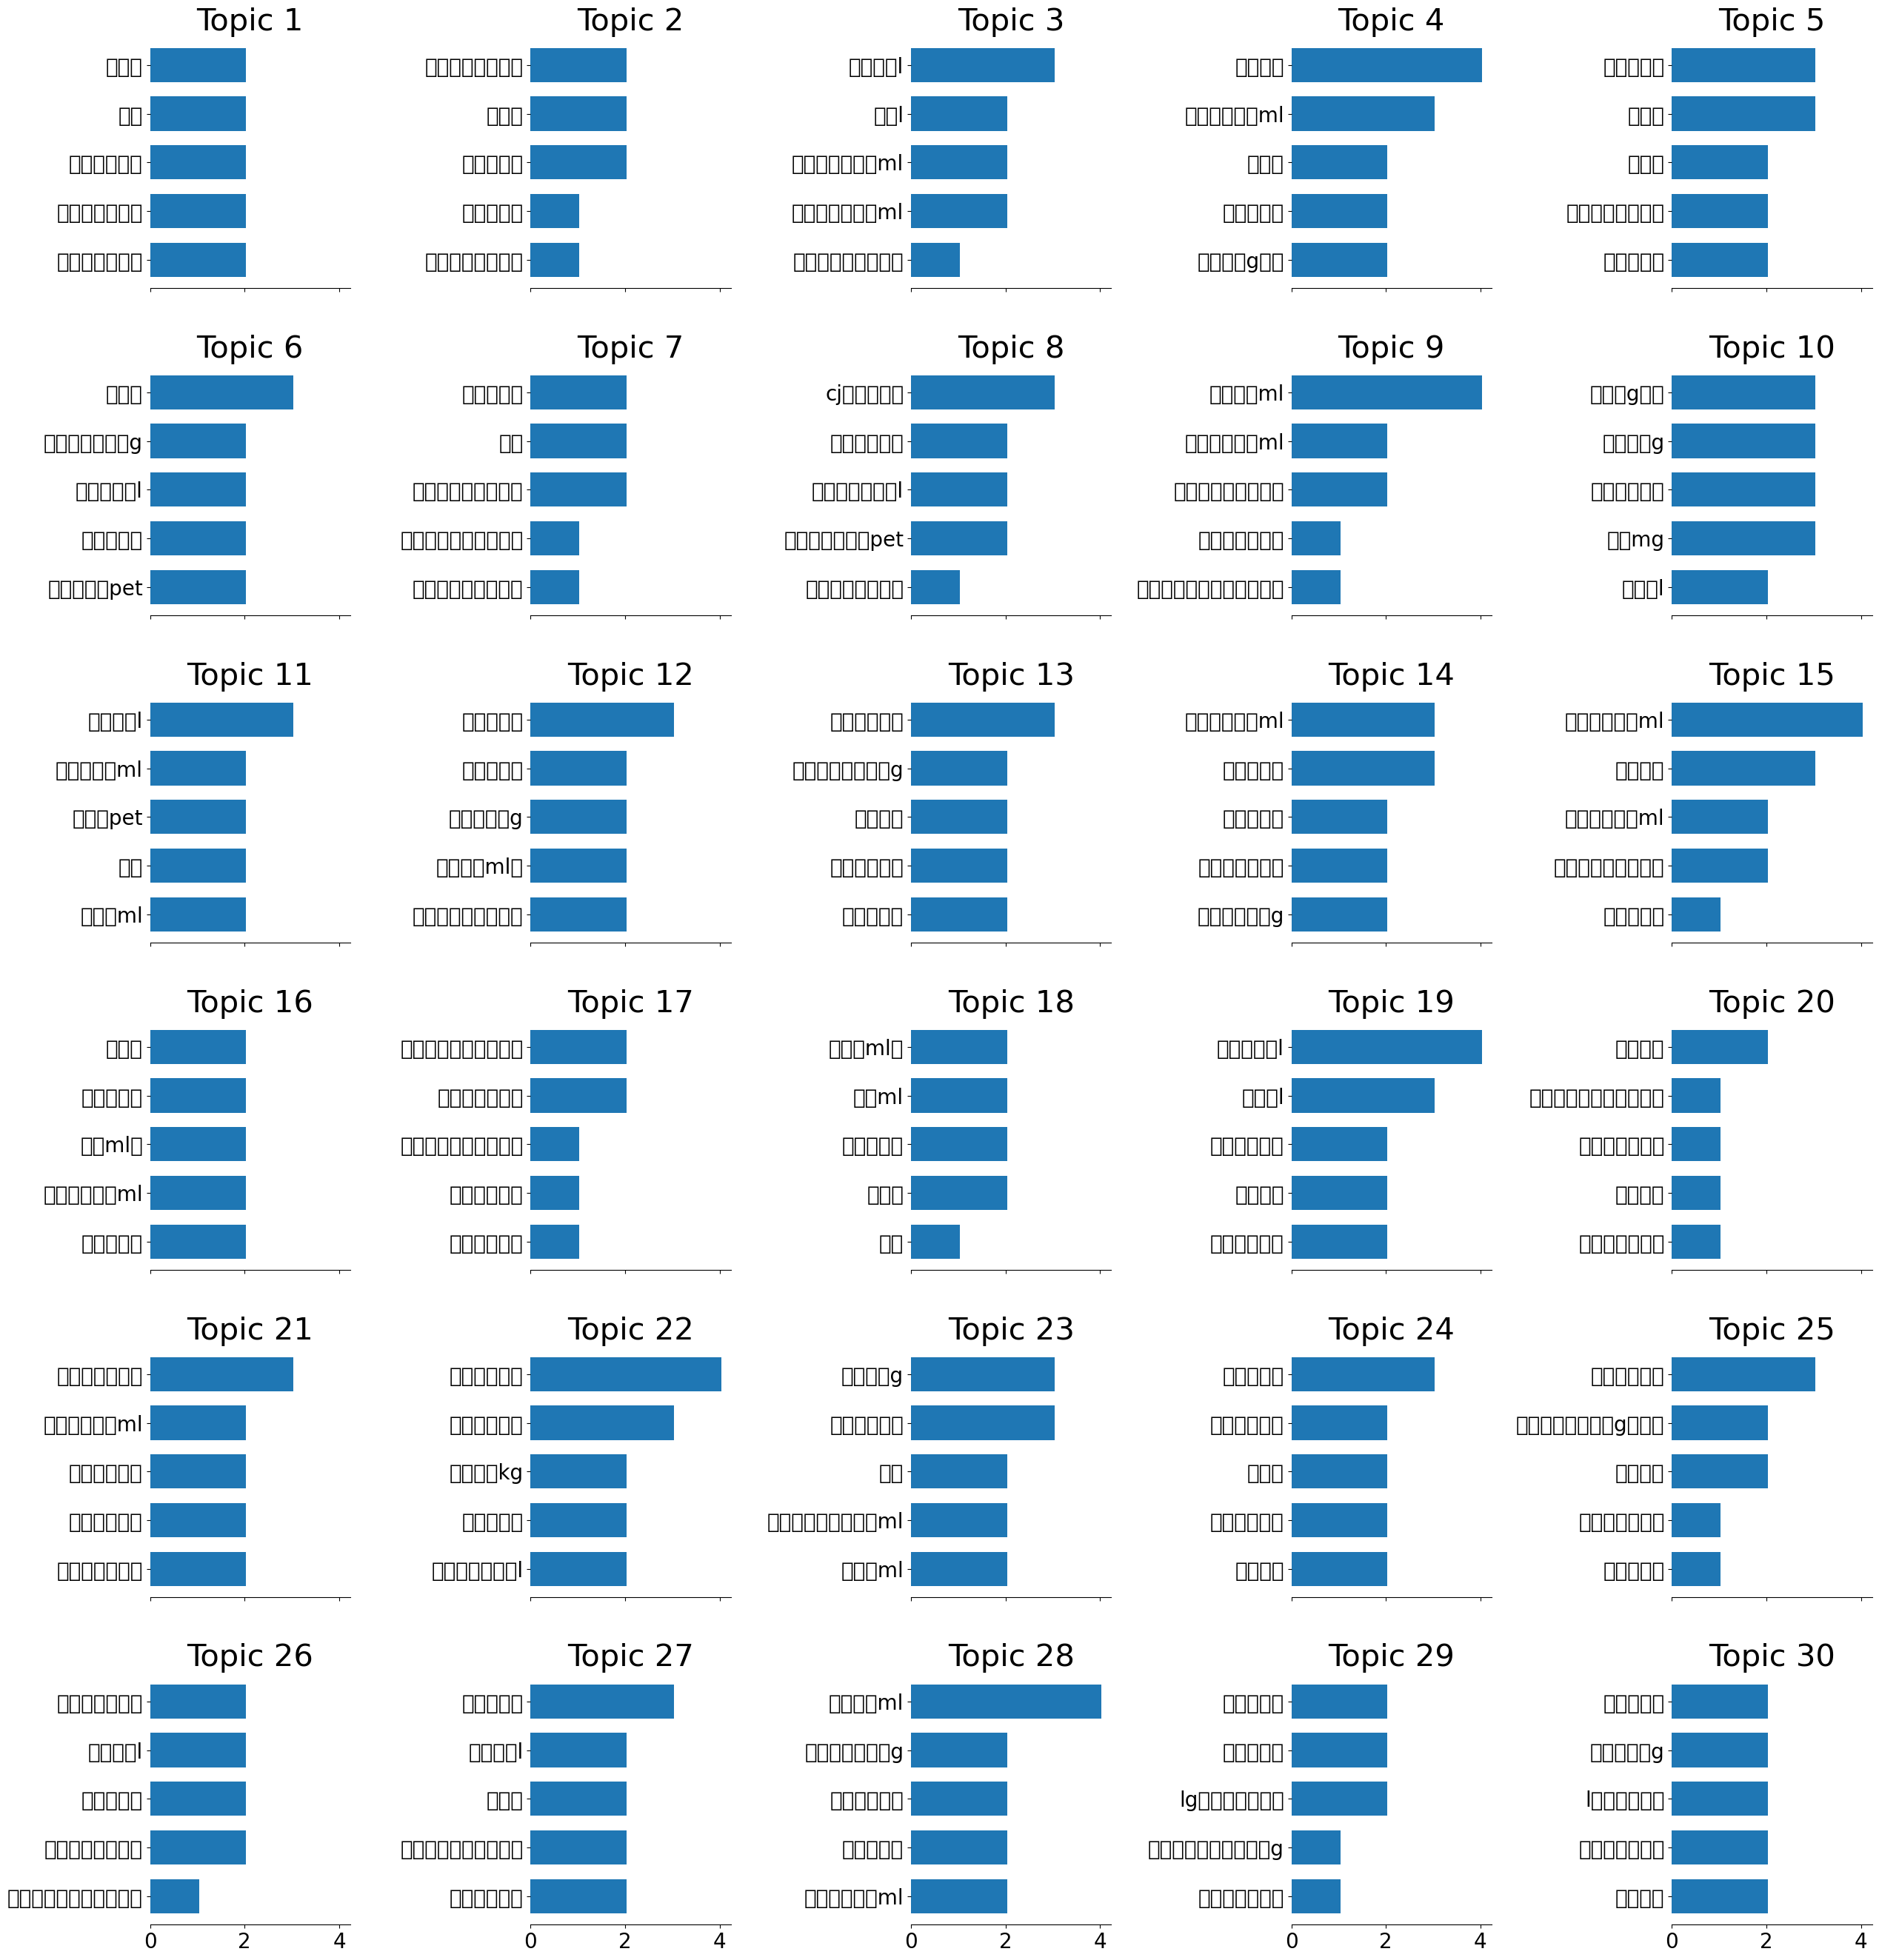

In [12]:
#LDA
lda = LatentDirichletAllocation(n_components=30, learning_decay=0.9)
X_lda = lda.fit(X_cv)

#Plot topics function. Code from: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(6, 5, figsize=(30, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
#Show topics
n_top_words = 5
feature_names = vectorizer_cv.get_feature_names()
plot_top_words(X_lda, feature_names, n_top_words, '')

In [13]:
#Fuzzywuzzy
X_fuzz = pd.crosstab([text4.index,text4],text4).apply(lambda col: [fuzz.token_sort_ratio(col.name, x) 
                                                                   for x in col.index.get_level_values(1)])

ValueError: All arrays must be of the same length